##### This simution project is based on the book A first course in probability by Sheldon Ross


In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import random
import math

## I. Axioms of Probability

One way of defining the probability of an event is in terms of its relative frequency (page 26)

- Axiom 1: $$0 \le P(E) \le 1$$
- Axiom 2: $$ P(S) = 1 $$
- Axiom 3: $$P(\bigcup\limits_{i=1}^n E_i) = \sum\limits_{i=1}^n P(E_i) $$


## II. Limit Theorem

### 1. WLLN
WLLN, Bernoulli's Theorem,states that as the sample size of independently and identically distributed random variables grow larger, the sample mean will tend to toward population mean. 
$$lim_{n\to \infty} P(|{\bar{x}} - \mu| \ge \epsilon) = 0$$

#### 1. Rolling a die
a. A die has 6 faces with the number from 1 to 6. Assume that six sides are equally likely to appear, then the probability of each face when tossing randomly will be $P(\{1\}) =P(\{2\}) = P(\{3\}) =P(\{4\}) = P(\{5\}) = P(\{6\}) = \frac{1}{6}$. Let's simulate and find the true probability for each face!\
    The example below is to find the probability of a die landed on number 1.

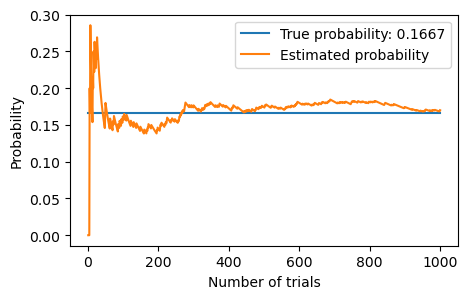

In [2]:
random.seed(10)
def roll_a_die():
    y = np.random.randint(1,7)
    if y == 1:
        return 1
    else:
        return 0 
    
number_of_trials = 1000
s = 0                                   #count the number of success
flips = list(range(1,number_of_trials+1))          #number of flip 
props = []                                       # each probability after each flip
                       
for i in range(number_of_trials):         
    s += roll_a_die()
    props.append(s/(i+1))  
    
fig,ax = plt.subplots(figsize = (5,3))

ax.plot([0,1000],[1/6,1/6],label = 'True probability: 0.1667')
ax.set_xlabel("Number of trials")
ax.set_ylabel("Probability")
ax.plot(flips,props, label = 'Estimated probability')
ax.legend();


Code explaination:
+ choose a random number y from 1 to 6
+ if y is 1, the function will return 1; otherwise, return 0
+ simulate the experiment for a thousand of times
+ flips will hold the total number of flips starting from 1
+ props will hold the probability after each flip

b. Tossing two die, the probability of both are have the same number is $\frac{6*1}{{6 \choose 1}{6 \choose 1}} = \frac{1}{6}$ since each toss is independent to each other.

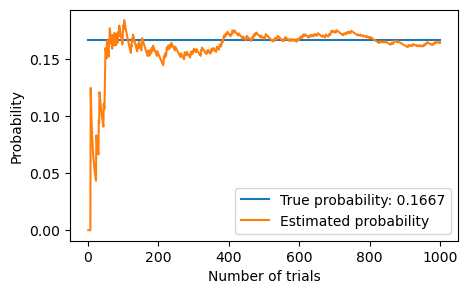

In [3]:
random.seed(10)
def roll_two_die():
    die_1 = np.random.randint(1,7)
    die_2 = np.random.randint(1,7)
    
    if die_1 == 1 and die_2 == 1:
        return 1
    elif die_1 == 2 and die_2 == 2:
        return 1
    elif die_1 == 3 and die_2 == 3:
        return 1
    elif die_1 == 4 and die_2 == 4:
        return 1
    elif die_1 == 5 and die_2 == 5:
        return 1
    elif die_1 == 6 and die_2 == 6:
        return 1
    else:
        return 0 
    
number_of_trials = 1000
s = 0                                   #count the number of success
flips = list(range(1,number_of_trials+1))          #number of flip 
props = []                                       # each probability after each flip
                       
for i in range(number_of_trials):         
    s += roll_two_die()
    props.append(s/(i+1))  
    
fig,ax = plt.subplots(figsize = (5,3))

ax.plot([0,1000],[6/36,6/36],label = 'True probability: 0.1667')
ax.set_xlabel("Number of trials")
ax.set_ylabel("Probability")
ax.plot(flips,props, label = 'Estimated probability')
ax.legend();


Code explaination:
+ choose a number randomly for two dice
+ if two dice have the same of any number, return 1, else return 0

c. Now, we would like to know the probability of rolling an even number. The events will be when the die lands on number 2, 4, or 6. \
Therefore, we then need to find $$P(\{2,4,6\}) = P(\{2\} \cup \{4\} \cup \{6\})$$ \
Since each roll is indepedent and according to Axiom 3, $$P(\{2\} \cup \{4\} \cup \{6\}) = P(\{2\}) + P(\{4\}) + P(\{6\}) = \frac{1}{2}$$

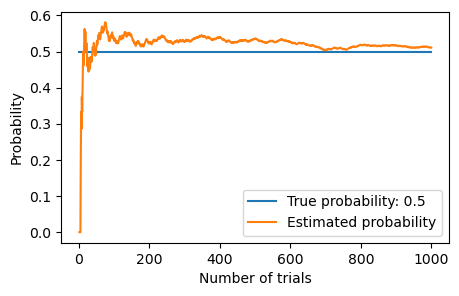

In [4]:
random.seed(11)
def roll_a_die():
    y = np.random.randint(1,7)
    if y % 2 == 0:
        return 1
    else:
        return 0 
    
number_of_trials = 1000
s = 0                                            #count the number of success
flips = list(range(1,number_of_trials+1))        #number of flip 
props = []                                       # each probability after each flip
                       
for i in range(number_of_trials):         
    s += roll_a_die()
    props.append(s/(i+1))  
    
fig,ax = plt.subplots(figsize = (5,3))

ax.plot([0,1000],[1/2,1/2],label = 'True probability: 0.5')
ax.set_xlabel("Number of trials")
ax.set_ylabel("Probability")
ax.plot(flips,props, label = 'Estimated probability')
ax.legend();
    

Code explaination:
+ choose randomly a number from 1 to 6
+ if the number mod 2 is 0, meaning the number is an even number, return 1, else return 0

We can notice that after 1000 trials, the probability of rolling an even number of die is 0.5

#### 2. Drawing Balls
Three balss are randomly drawn from a bowl containing 6 white and 5 black balls, what is the probability that one of the balls is white and the other two are black. \
In this class, the selection will be without replacement, which means the ball will not be put back to the bowl. Therefore, there are $11.10.9 = 990$ total outcomes as the sample space. \
There are three posibilites for the events:
- WBB: $6.5.4 = 120$ outcomes
- BWB: $5.6.4 = 120$ outcomes
- BBW: $5.4.6 = 120$ outcomes

$$\frac {120+120+120}{990} = \frac{4}{11}$$

Or, $$\frac{{6 \choose 1}{5 \choose 2}}{11 \choose 3}  = \frac{4}{11}$$

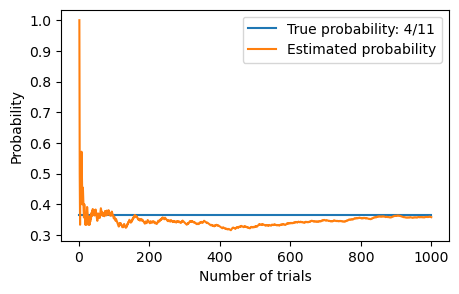

In [5]:
random.seed(9)

def draw_balls():
    bowl = [0] * 6 + [1] * 5           # 0 represents white balls and 1 represents black balls
    r = [];

    x = random.sample(bowl, 3)           #here we use random.sample to draw sample without replacement
    if sum(x) == 2:
        return 1
    else:
        return 0;

number_of_trials = 1000
s = 0                                            #count the number of success
flips = list(range(1,number_of_trials+1))        #number of flip 
props = []                                       # each probability after each flip
                       
for i in range(number_of_trials):         
    s += draw_balls()
    props.append(s/(i+1))  
    
fig,ax = plt.subplots(figsize = (5,3))

ax.plot([0,1000],[4/11,4/11],label = 'True probability: 4/11')
ax.set_xlabel("Number of trials")
ax.set_ylabel("Probability")
ax.plot(flips,props, label = 'Estimated probability')
ax.legend();


Code explaination:
+ we use numbers 0 and 1 to represent white and black balls
+ since we randomly draw three balls without replacement, we use random.sample to draw the balss randomly
+ we are looking for the probability of drawing one white ball and two black balls
+ the function will return 1 if the sum of drawn balls are 2, return 0 otherwise

#### 3. Dealing card
- A full house 5-card poker hand will consist of three cards of the same rank and the other two will have the same rank that is different the three first three. \
A sample space of dealing 5 cards is total of possible outcomes when dealing 5 cards out of 52 cards. \
For the event, there are 13 card typess and 4 different suits for each type, so the probability will be 
$$ \frac{13 . {4\choose 2} . 12 . {4\choose 3}}{52\choose 5} \approx 0.0014$$ 


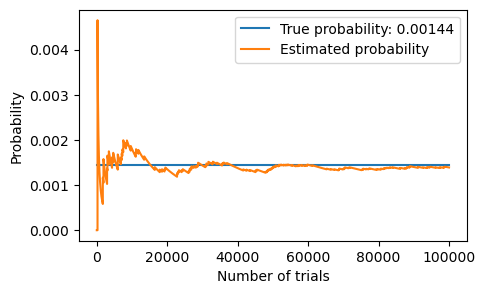

In [6]:
random.seed(11)
suits = ['Heart', 'Diamond','Club','Spade']
cards = list(range(1,14))
deck_of_cards = []
for i in suits:
    for j in cards:
        r = [i,j]
        deck_of_cards.append(r)

def dealing():
    x = random.sample(deck_of_cards,5)
    count = 1
    y = [i[1] for i in x]
    
    r = y[0]
    if len(set(y)) == 2:
        for i in range(1,5):
            if y[i] == r:
                count += 1
    if count == 2 or count == 3:
        return 1
    else:
        return 0

    
number_of_trials = 100000
s = 0
flips = list(range(1,number_of_trials+1)) 
probs = []

for i in range(number_of_trials):         
    s += dealing()
    probs.append(s/(i+1))
    
fig,ax = plt.subplots(figsize = (5,3))

ax.plot([0,100000],[6/4165,6/4165],label = 'True probability: 0.00144')
ax.set_xlabel("Number of trials")
ax.set_ylabel("Probability")
ax.plot(flips,probs, label = 'Estimated probability')
ax.legend();

Code explaination:
+ create a deck of 52 cards by 4 suits and 13 cards
+ in the function dealing(), deal 5-card hand randomly in store in x
+ create variable y that hold the ranks for the hand
+ set variable r to hold the first rank in the hand, count it as 1
+ use set(y) to remove duplicates
+ if len(set(y)) is two, there are only two rank types in the hand, meaning that the ranks contain either four of the same ranks and one different rank, or two of the same rank and the other three have the same rank 
+ then, count if there are not two or three of the same rank, but one or four instead, return 1
+ else return 0


In another event, there are 13 card typess and 4 different suits for each type, so the probability of three cards having the same suit and the other two will have the same suit that is different from the first one will be 
$$ \frac{4 . {13\choose 2} . 3 . {13\choose 3}}{52\choose 5} \approx 0.103$$ 

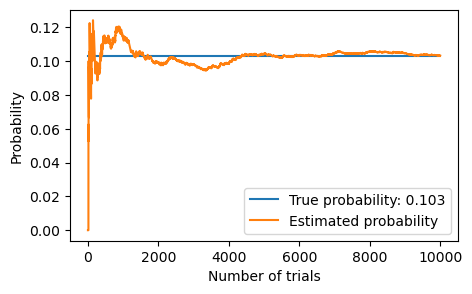

In [8]:
random.seed(11)

def dealing():
    x = random.sample(deck_of_cards,5)
    count = 1
    y = [i[0] for i in x]
    r = y[0]
    if len(set(y)) == 2:
        for i in range(1,5):
            if y[i] == r:
                count += 1
    if count == 2 or count == 3:
        return 1
    else:
        return 0

    
number_of_trials = 10000
s = 0
flips = list(range(1,number_of_trials+1)) 
probs = []

for i in range(number_of_trials):         
    s += dealing()
    probs.append(s/(i+1))
    
fig,ax = plt.subplots(figsize = (5,3))

ax.plot([0,10000],[0.103,.103],label = 'True probability: 0.103')
ax.set_xlabel("Number of trials")
ax.set_ylabel("Probability")
ax.plot(flips,probs, label = 'Estimated probability')
ax.legend();


Code explaination:
+ create a deck of 52 cards by 4 suits and 13 cards
+ in the function dealing(), deal 5-card hand randomly in store in x
+ create variable y that hold the suits for the hand
+ set variable r to hold the first suit in the hand, count it as 1
+ use set(y) to remove duplicates
+ if len(set(y)) is two, there are only two suits in the hand, meaning that the suits contain either four of the same suit and one different suit, or two of the same suit and the other three have the same suit 
+ then, count if there are not two or three of the same suit, but one or four instead, return 1
+ else return 0

#### 4. The matching problems (complementary probability)
- Suppose that each of N men at a party throws his hat into the center of the room. The hats are mixed up, and then each men randomly selects a hat. What is the probability that none of the men selects his own hat.

- Here, we are looking for $$P(\text{nobody selects his own hat}) = 1- P(\text{at least one selects his own hat})$$


- Denote $E_i $ for $ i = 1,2,..,N $ the event that the ith mean selects his own hat. 

$$P(\text{nobody selects his own hat}) = 1- P(E_1  \text{or}  E_2 ...  \text{or}  E_N) = 1- P(\bigcup\limits_{i=1}^n E_i)$$


- To find $P(\bigcup\limits_{i=1}^n E_i)$, we can use inclusion-exclusion identity. By proposition 4.4 in the textbook,
$$P(\bigcup\limits_{i=1}^n E_i) = \sum\limits_{i=1}^n P(E_i) - \sum P(E_{i_1}E_{i_2}...E_{i_n})$$ $$ = \sum\limits_{i=1}^n P(E_i) - \sum P(E_{i_1}E_{i_2})... + (-1)^{n+1} \sum P(E_{i_1}E_{i_2}...E{i_n}) +...+ (-1)^{N+1}P(E_1E_2...E_N)$$

- Denote N is the total number of hat drawn and n is the total the number of men selecting their own hat. 

- We can start by finding

$$P(E_{i_1}E_{i_2}...E{i_n}) = \frac{\text{number of men getting their own hat}}{\text{total outcomes}}$$

$$ = \frac{(N-n)!}{N!}$$

- There are $N\choose n $ terms,so $\sum P(E_{i_1}E_{i_2}...E_{i_n}) = \frac{N!(N-n)!}{(N-n)!n!N!} = \frac{1}{n!}$

- Therefore, $$P(\bigcup\limits_{i=1}^n E_i) = 1 - \frac{1}{2!}+\frac{1}{3!} - ...(-1)^{N+1}\frac{1}{N!} $$

- And, $$P(\text{nobody selects his own hat}) = 1 - 1 + \frac{1}{2!} - \frac{1}{3!} + ...(-1)^{N}\frac{1}{N!} = \sum\limits_{i=0}^N \frac{(-1)^i}{i!}  $$

$$ \lim\limits_{n -> \infty} \sum\limits_{i=0}^N \frac{(-1)^i}{i!}  = \frac{1}{e} $$ 






Suppose there are 20 men, let's simulate the data to find the true probability.

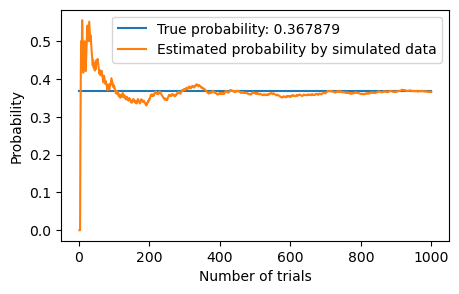

In [9]:
random.seed(11)
def picking_a_hat():
    men = list(range(1,21))
    hat = list(range(1,21))
    random.shuffle(hat)
    
    r = []
    for i in range(20):
        if men[i] == hat[i]:
            r.append(1)
        else:
            r.append(0)
    if sum(r) == 0:
        return 1
    else:
        return 0
    
number_of_trials = 1000
s = 0
flips = list(range(1,number_of_trials+1)) 
probs = []

for i in range(number_of_trials):         
    s += picking_a_hat()
    probs.append(s/(i+1))
    
fig,ax = plt.subplots(figsize = (5,3))

ax.plot([0,1000],[math.exp(-1),math.exp(-1)],label = 'True probability: 0.367879')
ax.set_xlabel("Number of trials")
ax.set_ylabel("Probability")
ax.plot(flips,probs, label = 'Estimated probability by simulated data')
ax.legend();   

Code explaination:
+ there are 20 men having 20 hats from 1 to 20
+ shuffle the hats 
+ then each man will pick a hat 
+ from man number 1 to man number 20, if the shuffled hat number picking equals to the man number
+ return 1 if there is any one that picked his own hat, return 0 otherwise

The probability indeed goes to $\frac{1}{e}$ as n goes large.

#### Example 45 (page 53): 
A woman has n keys, of which one will open her door. \
(a) If she tries the keys at random, discarding those that do not work, what is the probability that she will open the door on her kth try? 

Probability that she succeeds on the first try is $\frac{1}{n}$ 

For sucess in the second try, the probability will be $$P(\text{failure in her first attempt}) P(\text{success in her second attempt given failture of the first attempt})$$
$$ = \frac{n-1}{n}  \frac{1}{n-1} = \frac{1}{n}$$
and so on.

Hence, the probability she opens in her kth attempt is $\frac{1}{n}$

Suppose there are 30 keys and she is looking for the key number 1 for her door. The probability she will get in the 4th trial will be $\frac{1}{30}$

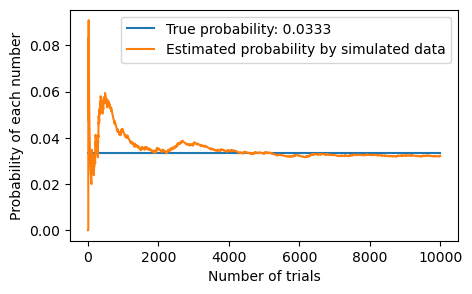

In [10]:
random.seed(12)
def picking_a_key():
    key = 1
    k_try = 4
    x = list(range(1,31))
    random.shuffle(x)
    for i in range(30):
        if x[i] == key and i == k_try - 1:
            return 1
    return 0     
            

number_of_trials = 10000
s = 0
flips = list(range(1,number_of_trials+1)) 
probs = []

for i in range(number_of_trials):         
    s += picking_a_key()
    probs.append(s/(i+1))
    
fig,ax = plt.subplots(figsize = (5,3))
ax.plot([0,10000],[1/30,1/30],label = 'True probability: 0.0333')
ax.set_xlabel("Number of trials")
ax.set_ylabel("Probability of each number")
ax.plot(flips,probs, label = 'Estimated probability by simulated data')
ax.legend(); 


Code explaination:
+ let's say she needs key number 1 the kth try is 4
+ the keys are shuffled into different orders
+ she will try one by one from key 1th to key 30th
+ when key is the key number 1, the correct key, and if the she got it on her 4th trial, return 1, return 0 otherwise

(b) What if she does not discard previously tried keys? \
The probability for her to open the door on her kth attempt is the probability she fails on her first attempt and succeed at kth attempt will be $P(\text{fails on first try} \times \text{fails on second try} ...  \times   \text{succeed in the kth try})$
$ = \frac{n-1}{n}...\frac{1}{n} = \left(1-\frac{1}{n}\right)^{k-1} \frac{1}{n}$

If she has 30 keys, then the probability of her get it on 20th try will be 0.0125 

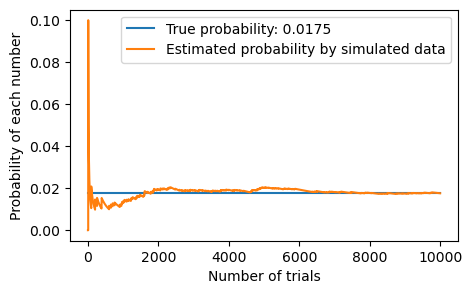

In [22]:
random.seed(15)
def picking_a_key(k_try):
    key = 1
    x = list(range(1,31))
    random.shuffle(x)

    for i in range(100):
        y = random.choice(x)
        if y == key:
            if i == k_try - 1:
                return 1
            return 0
    return 0
        

number_of_trials = 10000
s = 0
flips = list(range(1,number_of_trials+1)) 
probs = []
k_try = 20

for i in range(number_of_trials): 
    s += picking_a_key(k_try)
    probs.append(s/(i+1))
    
fig,ax = plt.subplots(figsize = (5,3))
ax.plot([0,10000],[0.0175,0.0175],label = 'True probability: 0.0175')
ax.set_xlabel("Number of trials")
ax.set_ylabel("Probability of each number")
ax.plot(flips,probs, label = 'Estimated probability by simulated data')
ax.legend(); 

Code explaination:
+ the keys are shuffled into different orders in a bag
+ she will attempt to try each key, but after each time she has a wrong key, she will put the key back into the bag and try again
+ when she finds the correct key, we will check if that is on her 4th try. If it is, return 1; otherwise, return 0